# 🚢 Titanic Project EDA + Machine Learning
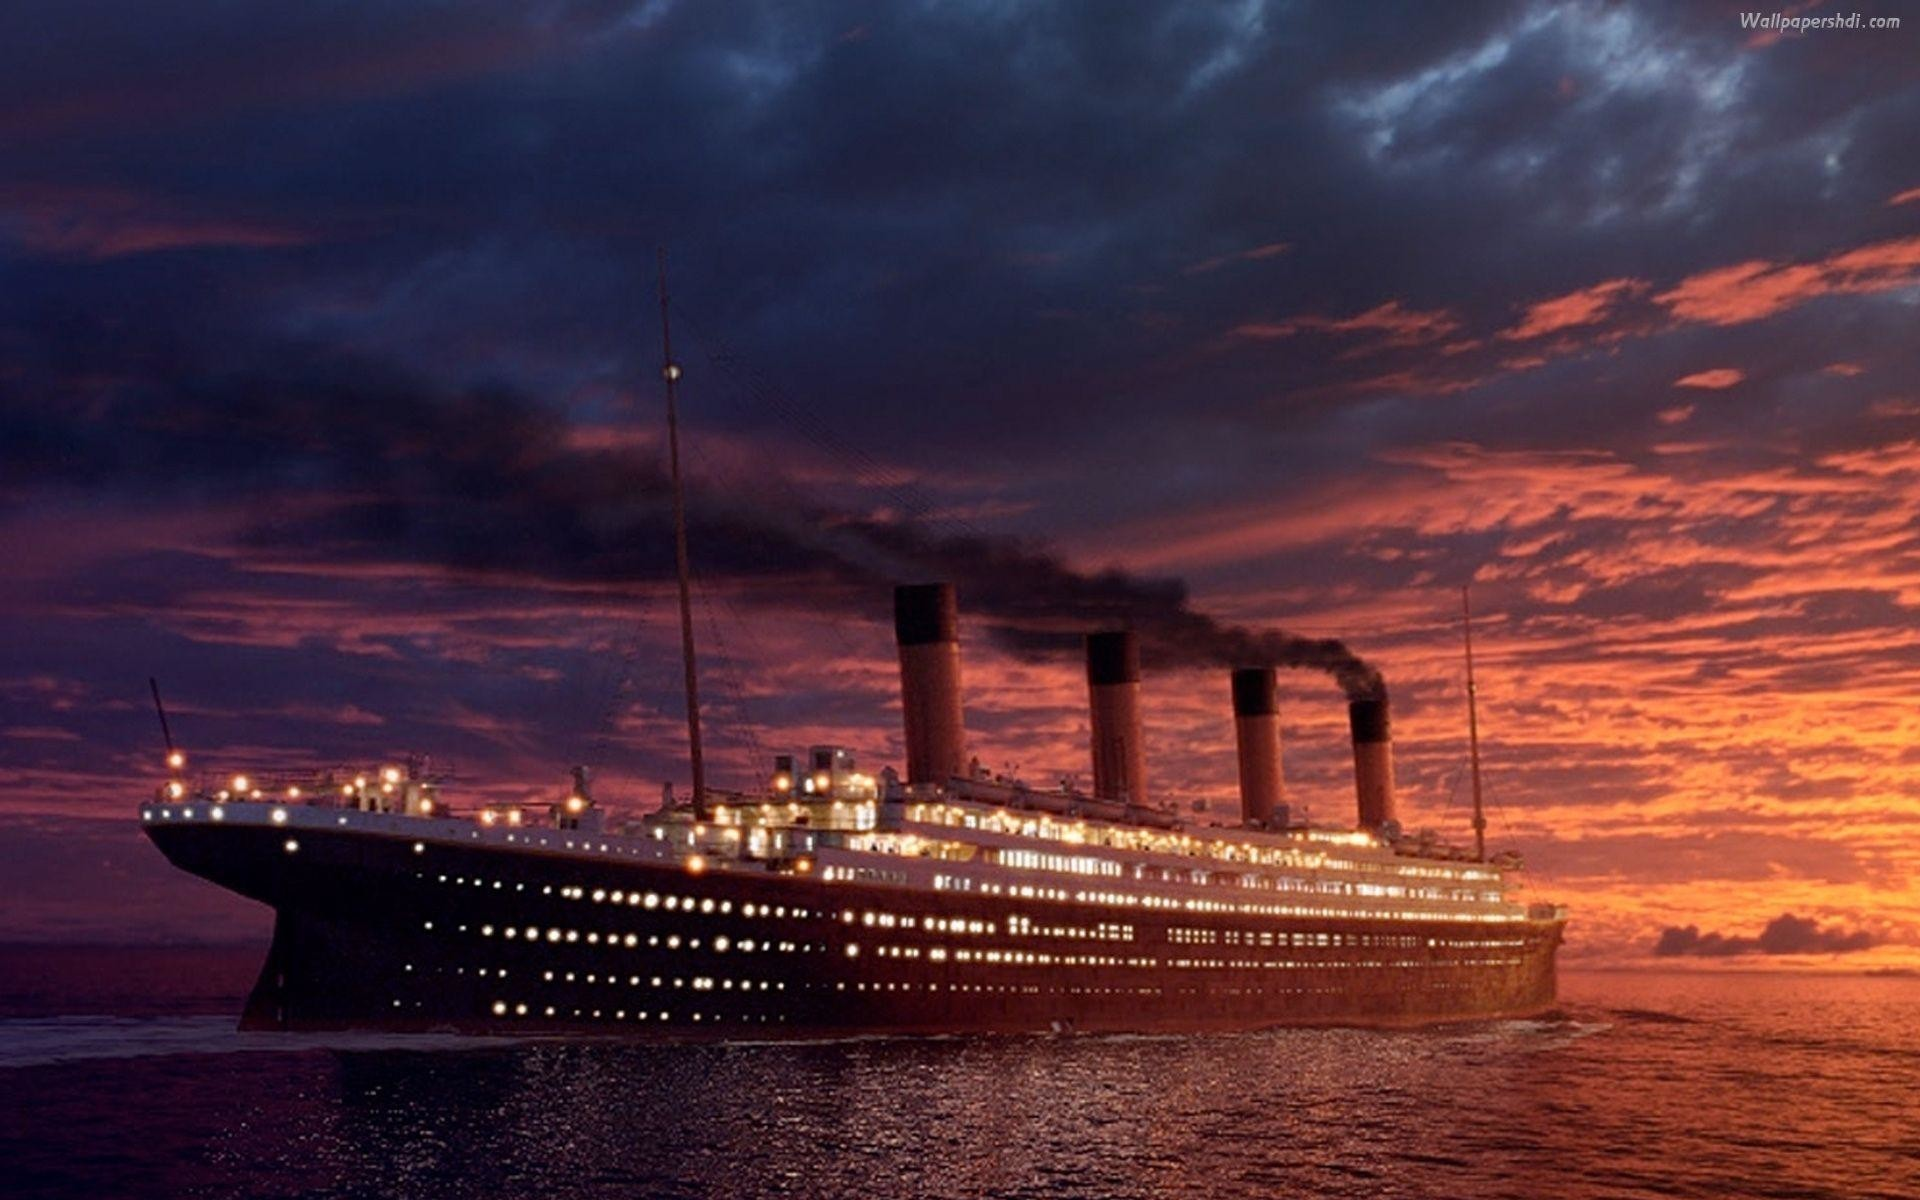
## Introduction

* **Titanic is the famous maritime disaster that struck an iceberg and sank on April 15, 1912. In this catastrophe, many people lost their lives, with only a small number miraculously surviving. It is known as the largest and most luxurious passenger ship of its time and remains one of the most iconic shipwrecks in world history. Even today, it continues to be a highly captivating historical event.**

## Content:

* [**1.** Library and Input File](#1)

* [**2.** Load and Check Data](#2)

* [**3.** Variable Description](#3)
    * [Univariate Variable Analysis](#4)
        * [Categorical Variable](#5)
        * [Numerical Variable](#6)
    * [Analysis Result](#7)
    
    
* [**4.** Basic Data Analysis](#8)

* [**5.** Outlier Detection](#9)

* [**6.** Missing Value](#10)
    
    * [Find Missing Value](#11)
    * [Fill Missing Value](#12)


* [**7.** Visualization](#13)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#14)
    * [Relationship Analysis  Sibsp -- Survived](#15)
    * [Relationship Analysis  Parch -- Survived](#16)
    * [Relationship Analysis  Pclass -- Survived](#17)
    * [Relationship Analysis  Age -- Survived](#18)
    * [Relationship Analysis Pclass -- Survived -- Age](#19)
    * [Relationship Analysis Embarked -- Sex -- Pclass -- Survived](#20)
    * [Relationship Analysis Embarked -- Sex -- Fare-- Survived](#21)
    
    
* [**8.** Fill Missing: Age Value](#22)
    * [Graph Analysis (Sex-Age)](#23)
    * [Graph Analysis (Sex-Age-Pclass)](#24)
    * [Graph Analysis (Sex-Age-Pclass)](#25)
    * [Graph Analysis (Collinearity)](#26)
    * [Age Prediciton](#27)
    
    
    
* [**9.** Feature Engineering](#28)
    * [Name-Title](#29)
    * [Family Size](#30)
    * [Embarked](#31)
    * [Ticket](#32)
    * [Pclass](#33)
    * [Sex](#34)    
    * [Drop Passenger ID and Cabin](#35)
 
 
* [**10.** Modeling](#36)
    * [Train and Test Split](#37)
    * [Simple Logistic Regression](#38)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#39)
    * [Ensemble Learning](#40)
    * [Prediction and Submission](#41)

<a id = "1"></a>
# 1. Library and Input File

In [1]:
!pip install seaborn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns
sns.color_palette("pastel")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id = "2"></a>
# 2. Load and Check Data

In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="3"></a>
# **3.** Variable Description

**There are 12 features in the data we use.**

## **Features:**

**1. PassengerId => Unique id numer to each Passenger**

**2. Survived => Indicates life status (1) means alive (0) means dead**

**3. Pclass => It refers to the passenger class; there are three different classes.**

**4. Name => Passenger Name**

**5. Sex => Indicates passenger gender**

**6. Age => Age of passenger**

**7. SibSp => Indicates whether the passenger is a sibling or spouse on board**

**8. Parch => Indicates whether the passenger has a parent or child on board.**

**9. Ticket => Passenger's ticket number**

**10. Fare => The fee paid by the passenger for the ticket**

**11. Cabin => Room Number Where the Passenger Stays**

**12. Embarke => Port where passenger embarked (C = Cherbourg, S = Southampton, Q = Queenstown)**


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Types of data content:**

* **float64(2): Fare and Age**

* **int64(5): Pclass, Sibsp, Parch, PassengerId and Survived**

* **object(5): Cabin, embarked, Name, Sex, Ticket**

<a id="4"></a>
# 4. Univariate Variable Analysis

* **A) Categorical Variable: Features that consist of two or more categories**
* **B) Numerical Variable: Variables Consisting of Numbers**

<a id="5"></a>
## A) Categorical Variable

### **Variable Contents:**
* **Survived**

* **Sex**

* **Pclass**

* **Embarked**

* **Cabin**

* **Name**

* **Sibsp**

* **Parch**

In [8]:
def bar_plot(variable):
    #get feature
    var = train_df[variable]
    #count number of categorical variable
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}".format(varValue))

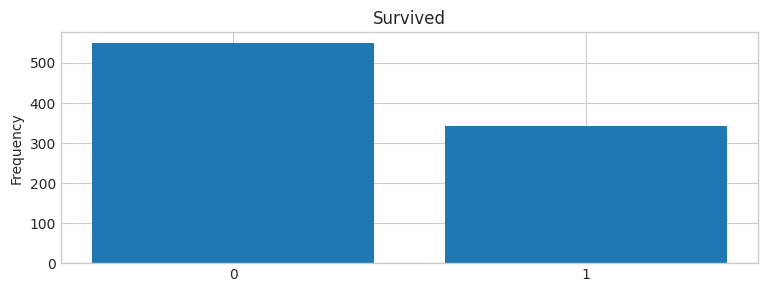

Survived
0    549
1    342
Name: count, dtype: int64


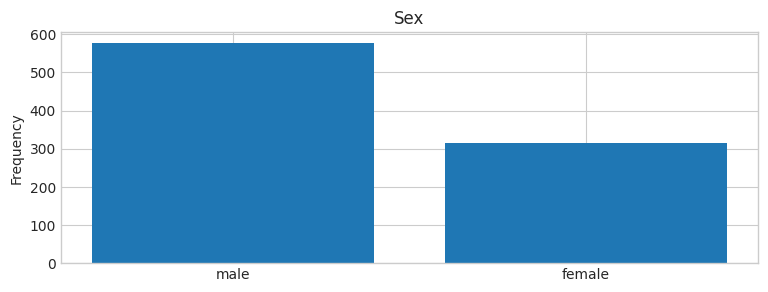

Sex
male      577
female    314
Name: count, dtype: int64


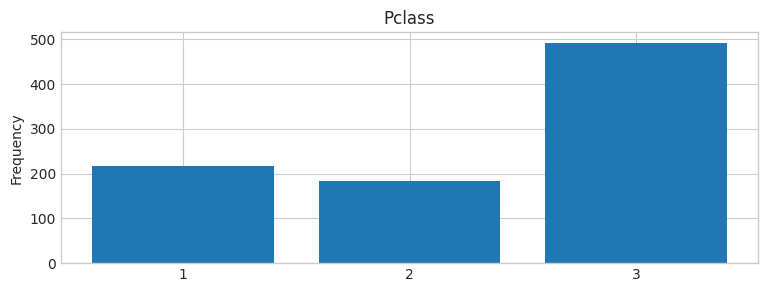

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


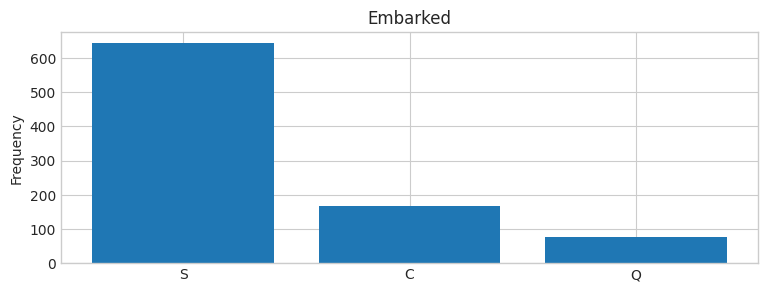

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


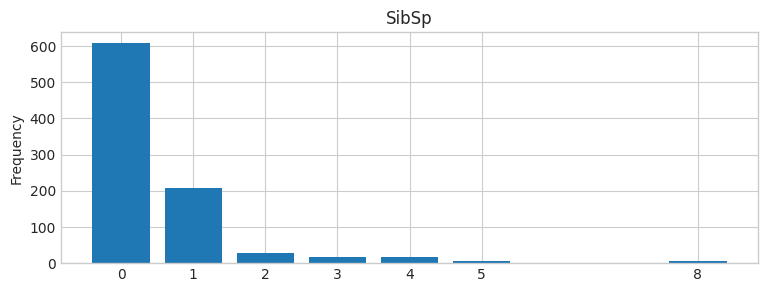

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


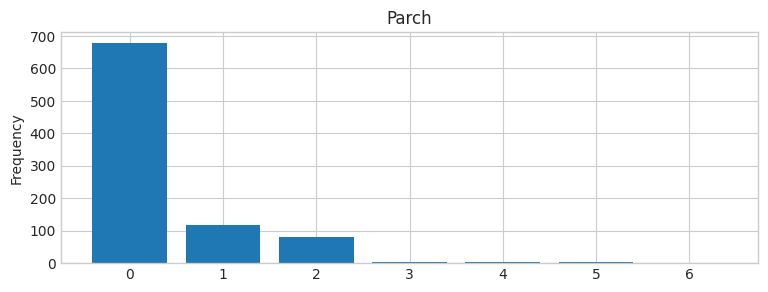

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for i in category1:
    bar_plot(i)
    

In [10]:
category2 = ["Cabin", "Name", "Ticket"]
for i in category2:
    print("{}:\n --------\n {} \n \n".format(i,train_df[i].value_counts))

Cabin:
 --------
 <bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object> 
 

Name:
 --------
 <bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object> 
 

Ticket:
 --------
 <bound met

<a id="6"></a>
## B) Numerical Variable

### **Variable Contents:**

* **Fare**

* **Age**

* **PassengerId**

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 80)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

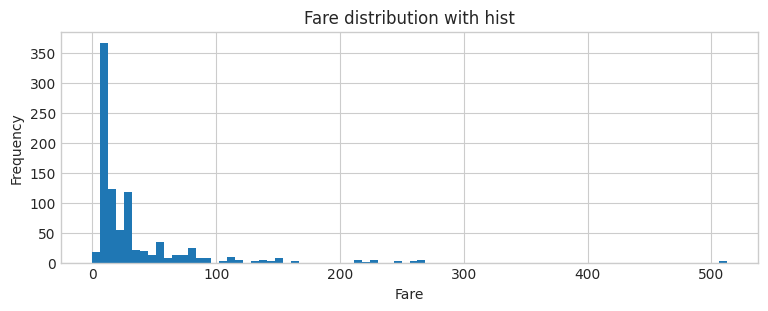

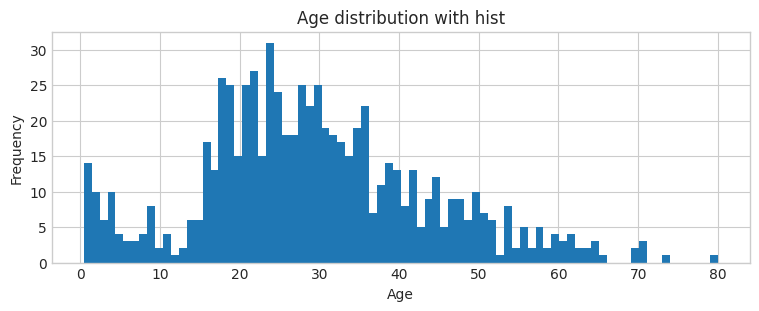

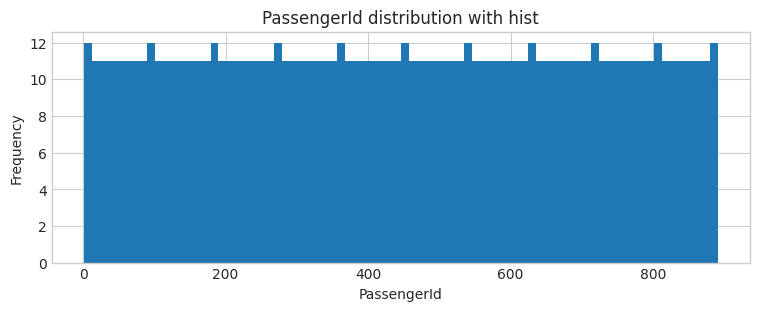

In [12]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id="7"></a>
## Analysis Result
* **The most striking point in this data analysis is the PassengerId data, because when the graph of the data is examined, it does not make sense and is generally meaningless and useless**

* **If we need to interpret the rest of the data content, for example, the fact that there are more men on board may tell us that the gender concentration in mortality is in men.**

* **Another analysis is as follows: When the ports of embarkation are taken into consideration, the number of people embarking from the port of Southampton is the highest, which indicates that people embarking from the port of Southampton may be concentrated in the mortality rate.**

* **Another analysis is as follows In this analysis, we will examine two graphs at the same time. When we look at the Pclass graph, it is observed that the 3rd class passengers are concentrated, in the same way, when the Fare graph is observed, it is seen that the majority of the passengers bought a $ 100 ticket, which means that the majority of the ship is observed to be individuals belonging to the lower class according to that period, which means that it can be said that these passengers are concentrated in the death rate. In addition, considering the conditions of that period, it is very possible that noble and rich passengers were evacuated from the ship first, which confirms our graphic interpretation.**

<a id="8"></a>
# 4. Basic Data Analysis
* **Here we will prove the situations I have described in the Analysis results with their graphical forms**

#### **Data to Compare**

1.  **Pclass - Survived**

1. **Sex - Survived**

1. **SibSp - Survived**

1. **Parch - Survived**

In [13]:
#Pclass - Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
#Sex - Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
#SivSp - Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index= False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
#Parch - Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "9"></a>
# 5. Outlier Detection
* **Outlier Detection: It allows us to identify the data that disrupts the stabilization of the data, in other words, manipulates the data that affects the data in a certain direction other than the course of the data.**


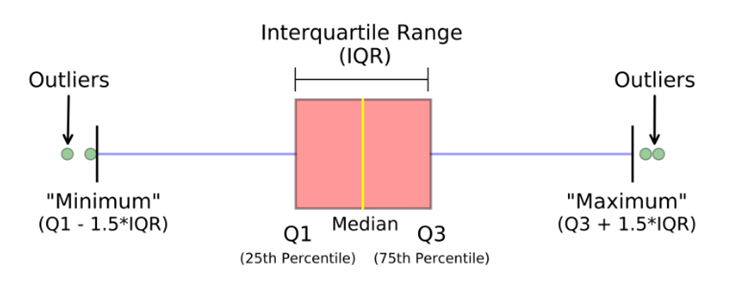

In [17]:
def detect_outlier(df,feature):
    outlier_indices = []
    for c in feature:
        #1st quartile
        Q1 = np.percentile(df[c], 25)
    
        #3rd quartile
        Q3 = np.percentile(df[c], 75)
    
        #IQR
        IQR = Q3-Q1
    
        #Outlier Step
        outlier_step = IQR * 1.5
    
        #Detect outlier and their ideces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    
        #Store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers
  

In [18]:
train_df.loc[detect_outlier(train_df,["Age", "SibSp", "Parch", "Fare"])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
#Drop Outliers
train_df = train_df.drop(detect_outlier(train_df,["Age", "SibSp", "Parch", "Fare"]),axis=0).reset_index(drop=True)

<a id="10"></a>
# 6. Missing Value

* **A) Find Missing Value**
* **B) Fill Missing Value**

In [20]:
train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df],axis = 0).reset_index(drop=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="11"></a>
## A) Find Missing Value

* **Here we will find features with null or missing values in our data and analyze them.**

In [21]:
print("Features with missing values \n", "-"*28)
train_df.columns[train_df.isnull().any()]

Features with missing values 
 ----------------------------


Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          1007
Survived        418
Age             256
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

<a id="12"></a>
## B) Fill Missing Value
* **We will correct Emarked and Mouse data as they are more valuable for this analysis**

* **Embarked has 2 missing values**
* **Fare has only 1**

In [23]:
print("Embarked has missing Values \n", "-"*28)
train_df[train_df["Embarked"].isnull()]

Embarked has missing Values 
 ----------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### How to fill Embarked data
* **We can associate the embarked data with Fare or Pclass, so we can fill in the empty Embarked data in line with this data. For example, two passengers whose Embarked data is missing purchased their tickets for 80 dollars, so the embarked data can be filled according to the density of people purchasing from the 80 dollar band**

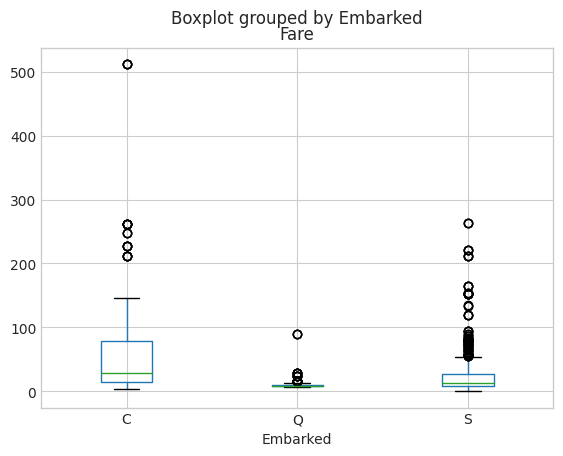

In [24]:
train_df.boxplot(column = "Fare", by = "Embarked")
plt.show()

In [25]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df.loc[[821,60]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C


In [26]:
print("Fare has missing Values \n", "-"*28)
train_df[train_df["Fare"].isnull()]

Fare has missing Values 
 ----------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


#### How to fill in Fare data¶
* **We can associate the overlaid data with Embarked or Pclass, so that we can fill in the empty Mouse data accordingly.**

In [27]:
print("3rd Class passenger's Fare average \n", "-"*28,"\n {} \n".format(np.mean(train_df[train_df["Pclass"] == 3]["Fare"])))

train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df.loc[[1033]]

3rd Class passenger's Fare average 
 ---------------------------- 
 12.741219971469329 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.74122,NaN,S


<a id="13"></a>
# 7. Visualization
* **In this section, we will visualize the data we have by considering different situations**

#### **Visualization Types:**

* **A) Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived**

* **B) Relationship Analysis Sibsp -- Survived**

* **C) Relationship Analysis Parch -- Survived**

* **D) Relationship Analysis Pclass -- Survived**

* **E) Relationship Analysis Age -- Survived**

* **F) Relationship Analysis Pclass -- Survived -- Age**

* **G) Relationship Analysis Embarked -- Sex -- Pclass -- Survived**

* **H) Relationship Analysis Embarked -- Sex -- Fare-- Survived**

<a id="14"></a>
## A) Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived
* **As you can see here, we measure the relationships between the features we have.**
* **For example, the mouse value and the survived value are correlated at the level of 0.26, which shows us that people who paid higher wages survived at a higher rate.**

<Axes: >

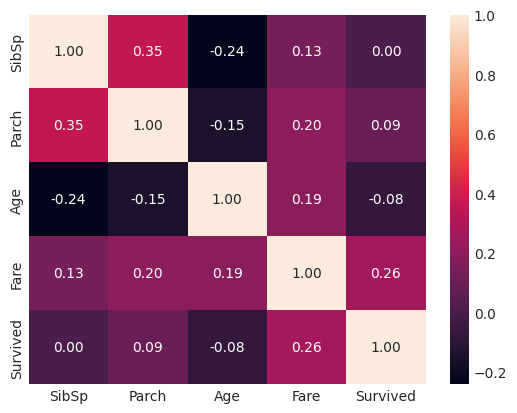

In [28]:
list1 =["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt = ".2f")

<a id="15"></a>
## B) Relationship Analysis Sibsp -- Survived
* **Here we observe the relationship of Sibsp data with the probability of survival**

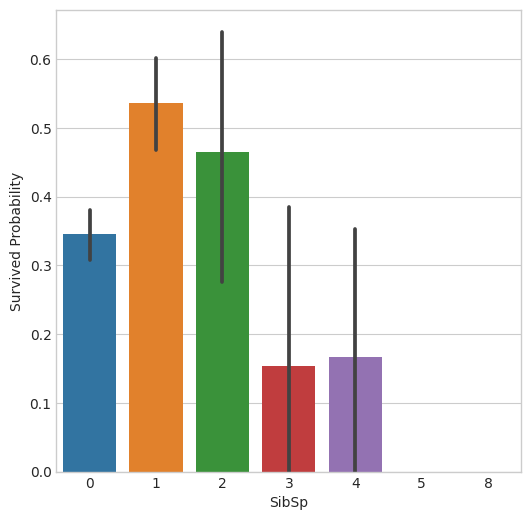

In [29]:
plt.figure(figsize=(6, 6))
g= sns.barplot(x="SibSp", y="Survived", data = train_df)
g.set_ylabel("Survived Probability")
plt.show()

<a id="16"></a>
## C) Relationship Analysis Parch -- Survived
* **Here we observe the relationship of Parch data with the probability of survival**

* **As can be seen here, although the chance of survival is high in families of 1 and 2 people, this rate is stable, but when looking at families of 3 people, although this rate is similar, its standard deviation is extremely high.**

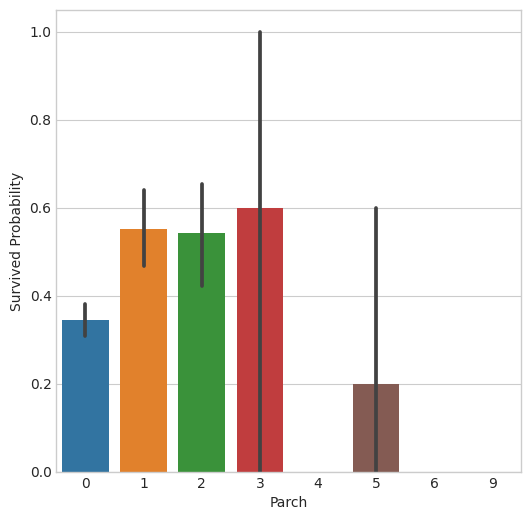

In [30]:
plt.figure(figsize = (6,6))
g = sns.barplot(x = "Parch", y = "Survived", data = train_df)
g.set_ylabel("Survived Probability")
plt.show()

<a id="17"></a>
## D) Relationship Analysis Pclass -- Survived
* **Here we observe the relationship of Pclass data with the probability of survival**

* **Pclass is the feature that gives the clearest and most distinct result regarding the probability of survival among the data.**

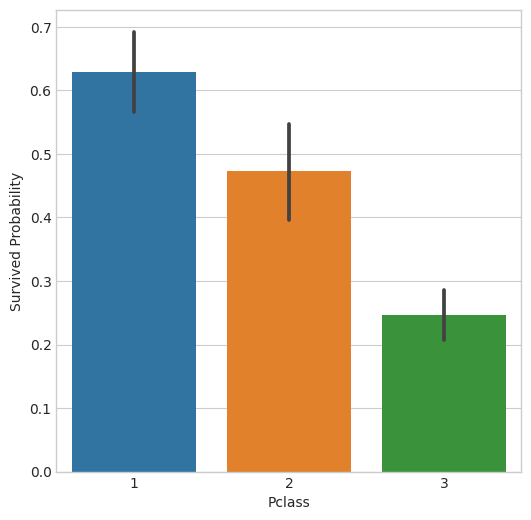

In [31]:
plt.figure(figsize=(6,6))
g = sns.barplot(x = "Pclass", y = "Survived", data = train_df)
g.set_ylabel("Survived Probability")
plt.show()

<a id="18"></a>
## E) Relationship Analysis Age -- Survived
* **Here we observe the relationship of Age data with the probability of survival**

* **Examining the graph, it can be observed that passengers aged 10 and under and passengers aged 75 and over are much more likely to survive.**

* **Additionally, the fact that passengers aged 75 and over have a smaller density in the graph is due to their numbers, but they have a good survival rate compared to their numbers.**

* **Looking at the graph of passengers who did not survive, we see that passengers between the ages of 20 and 25 have the highest probability of death.**

* **When we look at the graph of surviving passengers, we see that passengers in their 30s have the highest probability of survival.**



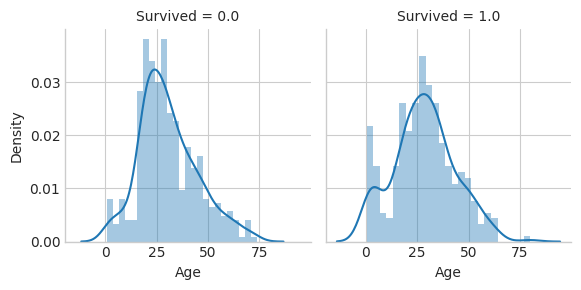

In [32]:
g = sns.FacetGrid(data = train_df, col ="Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

<a id="19"></a>
## F) Relationship Analysis Pclass -- Survived -- Age

* **As you can see here, when the passenger class is 1, the survival rate in old age is increasing, but when this passenger class is 3, there is almost no survival rate in old age.**

* **Generally speaking, as the passenger class goes from 1 to 3, the probability of survival decreases**

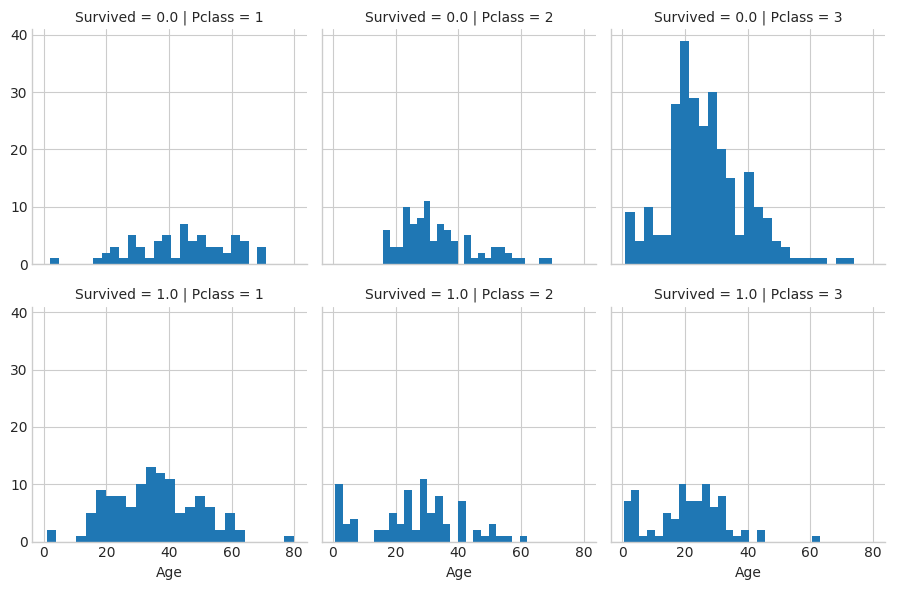

In [33]:
g = sns.FacetGrid(data=train_df, row = "Survived", col = "Pclass")
g.map(plt.hist,"Age",bins = 25)
g.add_legend()
plt.show()

<a id="20"></a>
## G) Relationship Analysis Embarked -- Sex -- Pclass -- Survived
* **For passengers boarding at port S, male passengers show a very low probability of survival regardless of class, while female passengers show a high survival rate in 1st and 2nd class, and a significant decrease in 3rd class passengers.**

* **For passengers boarding from port C, male passengers show a very high probability of survival in classes 1 and 2 and a lower rate in class 3, female passengers show a high survival rate in class 1 and a very low rate in class 2, and the situation is not very different for passengers in class 3.**

* **For passengers boarding at Q port, regardless of class, the survival rate of women is very high and the survival rate of men is very low, but if examined carefully, the rate decreases for 3rd class female passengers, but the deviation rate increases significantly.**

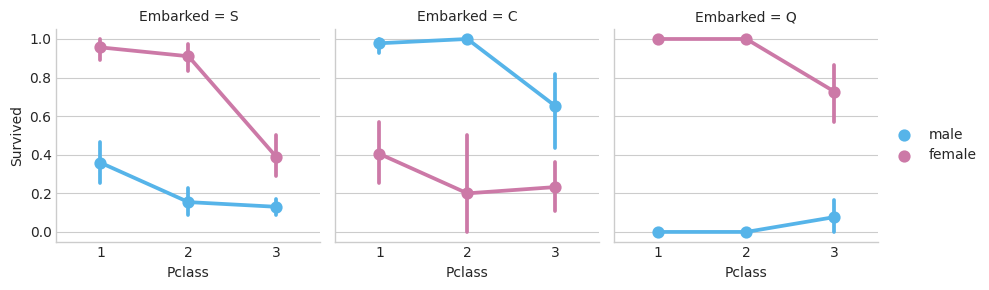

In [34]:
g = sns.FacetGrid(data=train_df, col = "Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex", palette=sns.color_palette(["#56B4E9","#CC79A7"]))
g.add_legend()
plt.show()

<a id="21"></a>
## H) Relationship Analysis Embarked -- Sex -- Fare-- Survived
* **We do not see a very different situation from the graph analysis above, in general, the life rate of passengers who pay more money than the port increases and this is more intense in the female population.**

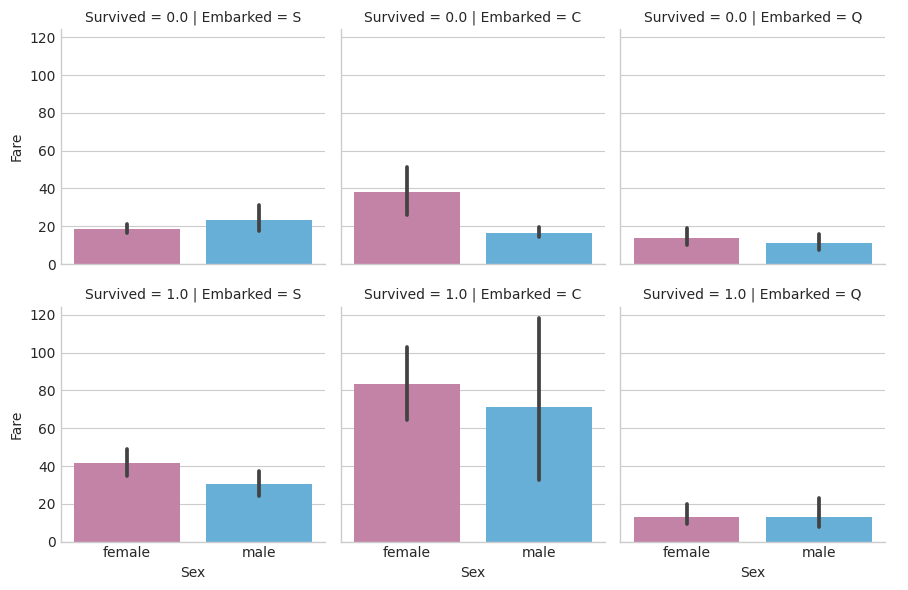

In [35]:
g = sns.FacetGrid(data=train_df, col="Embarked",row="Survived")
g.map(sns.barplot,"Sex","Fare", palette=sns.color_palette(["#CC79A7","#56B4E9"]))
g.add_legend()
plt.show()

<a id="22"></a>
# 8. Fill Missing: Age Value
* **A) Graph Analysis (Sex-Age)**

* **B) Graph Analysis (Sex-Age-Pclass)**

* **C) Graph Analysis (Sex-Age-Pclass)**

* **D) Graph Analysis (Collinearity)**

* **E) Age Prediciton**

In [36]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<a id="23"></a>
## A) Graph Analysis (Sex-Age)
* **As we can see, gender clearly does not give us information about age**

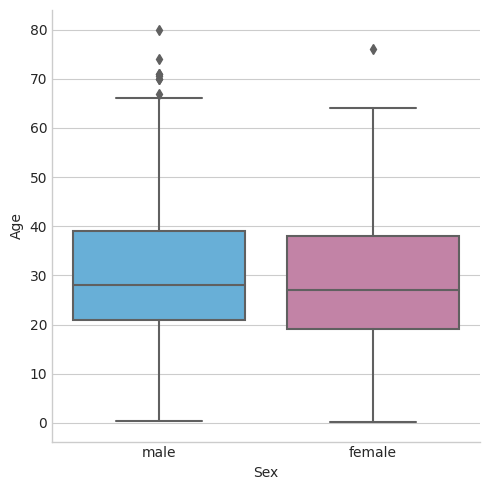

In [37]:
sns.catplot(x="Sex",y="Age",data=train_df, kind="box", palette=sns.color_palette(["#56B4E9","#CC79A7"]))
plt.show()

<a id="24"></a>
## B) Graph Analysis (Sex-Age-Pclass)
* **As can be seen here, passenger classes provide sufficient information on age as well as gender distribution.**

<Figure size 1000x1000 with 0 Axes>

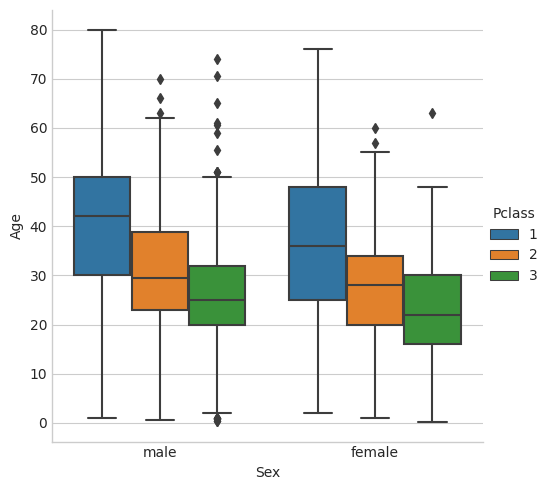

In [38]:
plt.figure(figsize=(10,10))
sns.catplot(x="Sex", y="Age", hue="Pclass", data=train_df, kind="box")
plt.show()

<a id="25"></a>
## C) Graph Analysis (Sex-Age-Pclass)
* **Looking at these graphs, although both graphs provide us with acceptable values about age information, we may need to apply trasholding at certain points, we can eliminate some values for cleaner results.**

<Figure size 1000x1000 with 0 Axes>

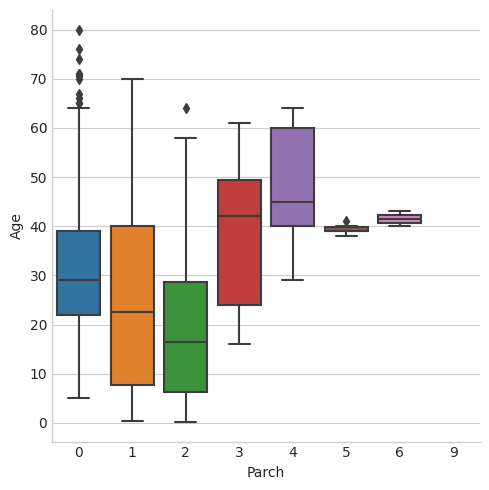

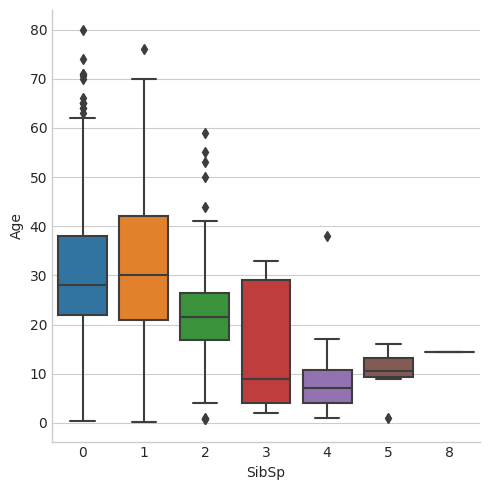

In [39]:
plt.figure(figsize=(10,10))
sns.catplot(x="Parch", y="Age", data=train_df, kind="box")
sns.catplot(x="SibSp", y="Age", data=train_df, kind="box")
plt.show()

<a id="26"></a>
## D) Graph Analysis (Collinearity)
* **Here we can observe the characteristics most associated with Age**
*  **Since the sex feature cannot be used here in the Collinearity process, we have rearranged it with an int value to make it usable.**

In [40]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

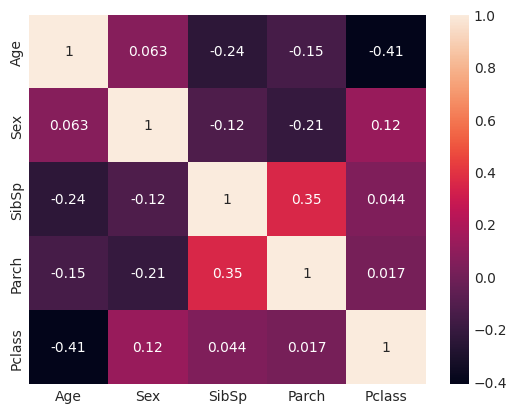

In [41]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot = True)
plt.show()

<a id="27"></a>
## E) Age Prediciton 
* **Here, we estimated age by averaging Age data with values equal to the SibSp Pclass Parch values corresponding to the indices of the empty age values we have.**

* **We also filled the empty age values SibSp Parch and Pclass with the average age of the population.**

In [42]:
index_nan_age = list(train_df[train_df["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"]==train_df.iloc[i]["SibSp"])&(train_df["Parch"]==train_df.iloc[i]["Parch"])&(train_df["Pclass"]==train_df.iloc[i]["Pclass"]))].median()
    
    age_median = train_df["Age"].median()
    
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    
    else: 
        train_df["Age"].iloc[i] = age_median

In [43]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="28"></a>
# 9. Feature Engineering
**Feature engineering or feature extraction or feature discovery is the process of extracting features from raw data.**

#### **Feature Engineering Types:**
* **A) Name-Title**
* **B) Family Size**
* **C) Embarked**
* **D) Ticket**
* **E) Pclass**

<a id="29"></a>
## A) Name-Title
* **Here we have taken the useless name values for training the model and converted them into title values, thus creating a new attribute that we can now process and numerically examine. As a result, we have removed the name attribute from the data, replacing it with the title attribute**

In [44]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [45]:
name = train_df["Name"]
train_df["Title"] =  [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

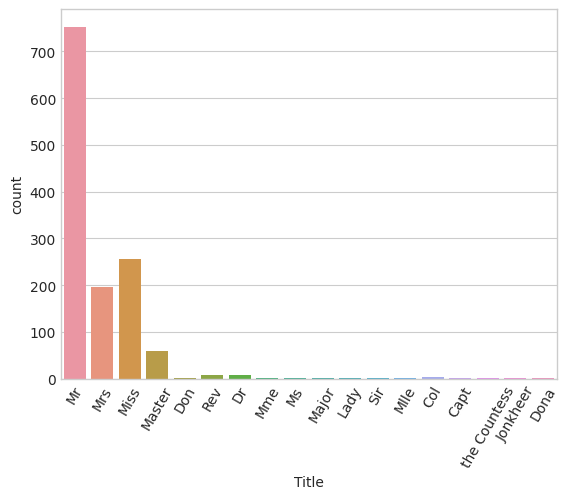

In [46]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

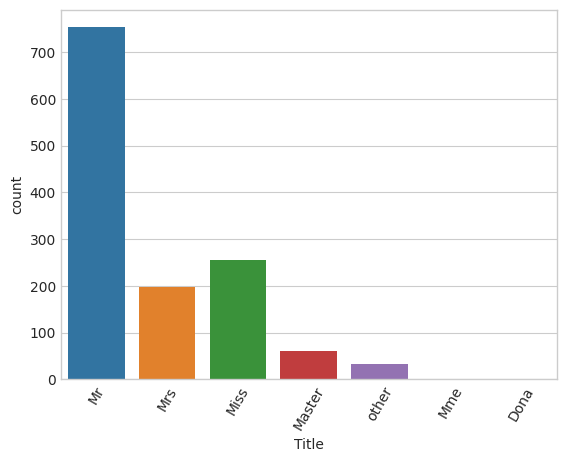

In [47]:
#conver to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Jonkheer","Donna","Don","Rev","Dr","Mmme","Ms","Major","Sir","Mlle"],"other")
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

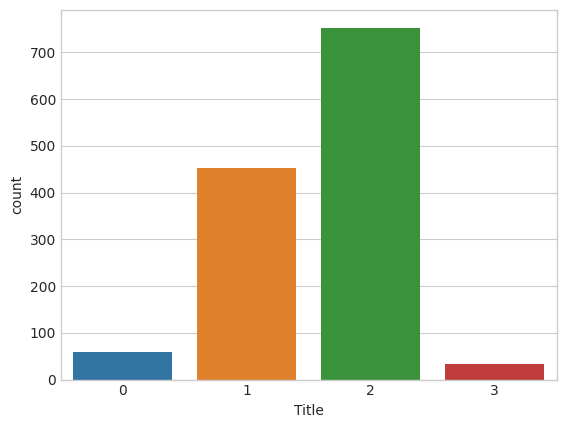

In [48]:
train_df["Title"] = [0 if i =="Master" else 1 if i =="Miss" or i == "Ms" or i == "Mrs" else 2 if i =="Mr" else 3 for i in train_df["Title"]]
sns.countplot(x="Title", data = train_df)
plt.show()

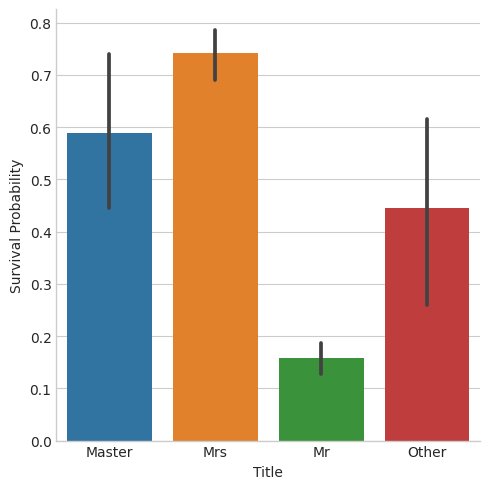

In [49]:
g = sns.catplot(x="Title", y="Survived", data = train_df, kind ="bar")
g.set_xticklabels(['Master','Mrs','Mr','Other'])
g.set_ylabels("Survival Probability")
plt.show()

In [50]:
train_df = pd.get_dummies(train_df, columns = ["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


### Result
* **In general, since we can examine the life rates of titles, we no longer need the name label, which means that we no longer need the name label, because we can now extract the results that we can no longer extract from the name with a different label. We will train our model with Title, not name**

In [51]:
train_df.drop(labels = ["Name"], axis =1, inplace = True)

In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


<a id="30"></a>
## B) Family Size

* Here we will create a single family size by combining Parch and SibSp values

In [53]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"]
train_df.drop(labels=["SibSp","Parch"], axis=1, inplace = True)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,S,False,False,True,False,1
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,C,False,True,False,False,1
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,0
3,4,1.0,1,0,35.0,113803,53.1000,C123,S,False,True,False,False,1
4,5,0.0,3,1,35.0,373450,8.0500,NaN,S,False,False,True,False,0
5,6,0.0,3,1,25.0,330877,8.4583,NaN,Q,False,False,True,False,0
6,7,0.0,1,1,54.0,17463,51.8625,E46,S,False,False,True,False,0
7,8,0.0,3,1,2.0,349909,21.0750,NaN,S,True,False,False,False,4
8,9,1.0,3,0,27.0,347742,11.1333,NaN,S,False,True,False,False,2
9,10,1.0,2,0,14.0,237736,30.0708,NaN,C,False,True,False,False,1


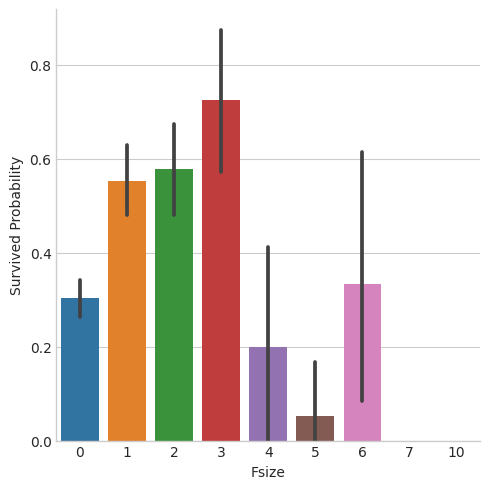

In [54]:
g= sns.catplot(x="Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability") 
plt.show()

#### Note: 
* **At this point, we apply a thresholding for Fsize values 5 and after 5 because the density in the data is not significant for values 5 and after 5.**

In [55]:
train_df["family_size"] =[1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,S,False,False,True,False,1,1
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,C,False,True,False,False,1,1
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,0,1
3,4,1.0,1,0,35.0,113803,53.1000,C123,S,False,True,False,False,1,1
4,5,0.0,3,1,35.0,373450,8.0500,NaN,S,False,False,True,False,0,1
5,6,0.0,3,1,25.0,330877,8.4583,NaN,Q,False,False,True,False,0,1
6,7,0.0,1,1,54.0,17463,51.8625,E46,S,False,False,True,False,0,1
7,8,0.0,3,1,2.0,349909,21.0750,NaN,S,True,False,False,False,4,1
8,9,1.0,3,0,27.0,347742,11.1333,NaN,S,False,True,False,False,2,1
9,10,1.0,2,0,14.0,237736,30.0708,NaN,C,False,True,False,False,1,1


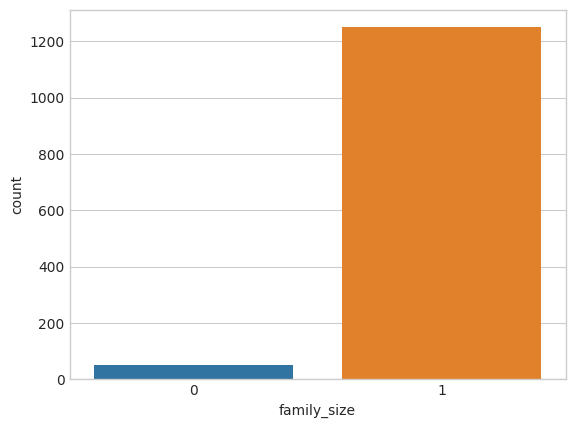

In [56]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

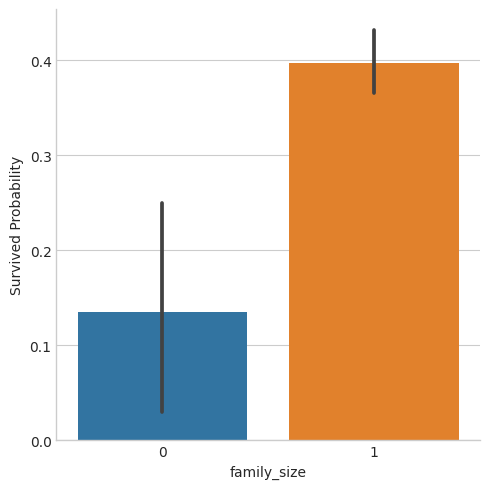

In [57]:
g= sns.catplot(x="family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

In [58]:
train_df = pd.get_dummies(train_df, columns = ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,S,False,False,True,False,1,False,True
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,C,False,True,False,False,1,False,True
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,0,False,True
3,4,1.0,1,0,35.0,113803,53.1000,C123,S,False,True,False,False,1,False,True
4,5,0.0,3,1,35.0,373450,8.0500,NaN,S,False,False,True,False,0,False,True


## Result
* **As a result of this analysis, we observe that passengers with small family sizes have a much lower average survival rate, while passengers with large families have an increase in survival rates, with the deviations in survival rates being much higher for small families and much more stable for large families**

<a id="31"></a>
## C) Embarked
* **Thanks to this application, we will now be able to train our model with Embarked values**

In [59]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

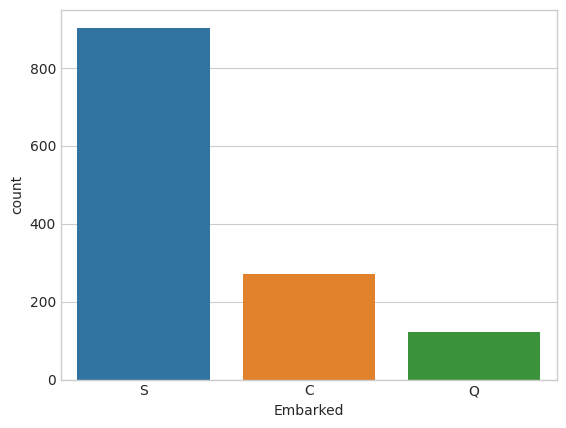

In [60]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [61]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"])
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,False,False,True,False,1,False,True,False,False,True
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,False,True,False,False,1,False,True,True,False,False
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,0,False,True,False,False,True
3,4,1.0,1,0,35.0,113803,53.1000,C123,False,True,False,False,1,False,True,False,False,True
4,5,0.0,3,1,35.0,373450,8.0500,NaN,False,False,True,False,0,False,True,False,False,True
5,6,0.0,3,1,25.0,330877,8.4583,NaN,False,False,True,False,0,False,True,False,True,False
6,7,0.0,1,1,54.0,17463,51.8625,E46,False,False,True,False,0,False,True,False,False,True
7,8,0.0,3,1,2.0,349909,21.0750,NaN,True,False,False,False,4,False,True,False,False,True
8,9,1.0,3,0,27.0,347742,11.1333,NaN,False,True,False,False,2,False,True,False,False,True
9,10,1.0,2,0,14.0,237736,30.0708,NaN,False,True,False,False,1,False,True,True,False,False


<a id="32"></a>
## D) Ticket

In [62]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [63]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [64]:
train_df = pd.get_dummies(train_df, columns = ["Ticket"],prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,0,38.0,71.2833,C85,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,0,26.0,7.9250,NaN,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,0,35.0,53.1000,C123,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,1,35.0,8.0500,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5,6,0.0,3,1,25.0,8.4583,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,True
6,7,0.0,1,1,54.0,51.8625,E46,False,False,True,...,False,False,False,False,False,False,False,False,False,True
7,8,0.0,3,1,2.0,21.0750,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8,9,1.0,3,0,27.0,11.1333,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1.0,2,0,14.0,30.0708,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,True


<a id="33"></a>
## E) Pclass

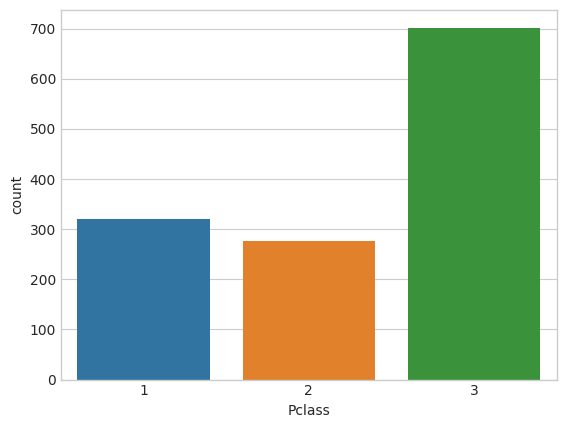

In [65]:
sns.countplot(x = "Pclass", data=train_df)
plt.show()

In [66]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,7.2500,NaN,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,71.2833,C85,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,7.9250,NaN,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,53.1000,C123,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,1,35.0,8.0500,NaN,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


<a id="34"></a>
## F) Sex

In [67]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,7.2500,NaN,False,False,True,False,1,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,71.2833,C85,False,True,False,False,1,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,7.9250,NaN,False,True,False,False,0,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,53.1000,C123,False,True,False,False,1,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,8.0500,NaN,False,False,True,False,0,...,False,False,False,False,True,False,False,True,False,True


<a id="35"></a>
## G) Drop Passenger ID and Cabin

In [68]:
train_df.drop(labels= ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [69]:
train_df.head()

,Survived,Age,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0.0,22.0,7.2500,False,False,True,False,1,False,True,...,False,False,False,False,False,False,False,True,False,True
1,1.0,38.0,71.2833,False,True,False,False,1,False,True,...,False,False,False,False,False,True,False,False,True,False
2,1.0,26.0,7.9250,False,True,False,False,0,False,True,...,False,False,False,False,False,False,False,True,True,False
3,1.0,35.0,53.1000,False,True,False,False,1,False,True,...,False,False,False,False,True,True,False,False,True,False
4,0.0,35.0,8.0500,False,False,True,False,0,False,True,...,False,False,False,False,True,False,False,True,False,True


<a id =36></a>
# 10. Modeling

#### **The table I have prepared for you below explains the preparation of a data for validation, followed by parameter tuning of the obtained data and, if appropriate, testing the model with validation data.**

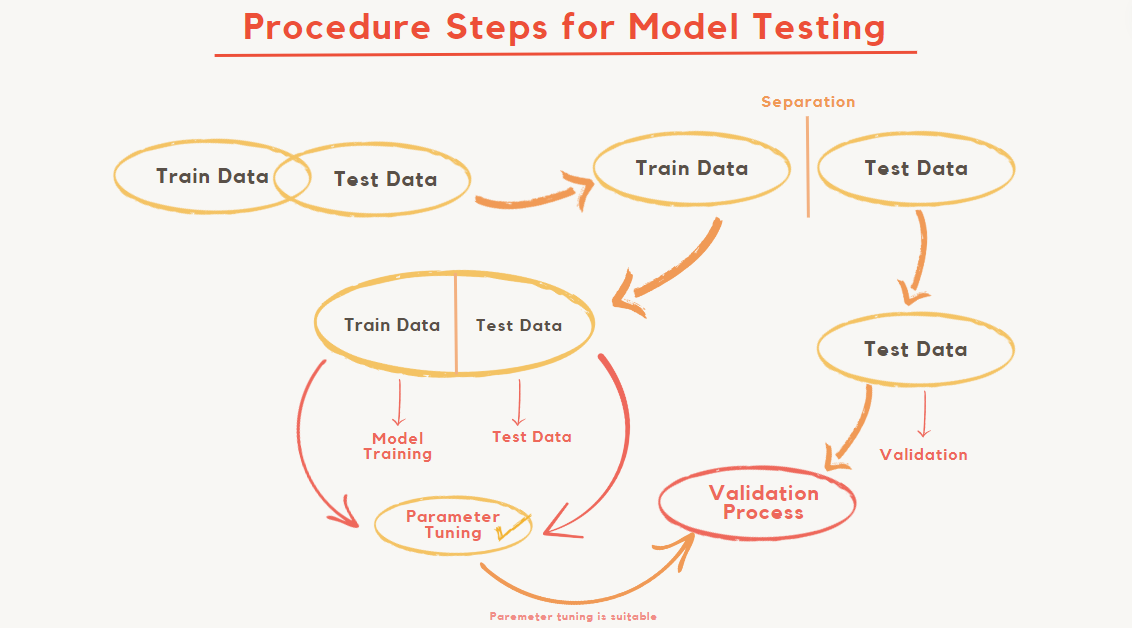

In [70]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

## Important Reminder
* **In the [Missing Value](#10) section, the data presented separately as test and train were combined under the name train_df in order to be able to process them at the same time, and in the missing value section, the first version of train_df min was saved in the train_df_len variable in order to be able to segment it by restoring it in the following processes.**

In [71]:
print(train_df_len)
print(len(train_df))

881
1299


In [72]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"], axis=1,inplace = True)

In [73]:
test.head(100)

,Age,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,7.8292,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,False,True,False,True
882,47.0,7.0000,False,True,False,False,1,False,True,False,...,False,False,False,False,True,False,False,True,True,False
883,62.0,9.6875,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,True,False,False,True
884,27.0,8.6625,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,False,True,False,True
885,22.0,12.2875,False,True,False,False,2,False,True,False,...,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,25.0,7.7958,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,False,True,False,True
977,76.0,78.8500,False,True,False,False,1,False,True,False,...,False,False,False,False,True,True,False,False,True,False
978,29.0,7.9250,False,False,True,False,0,False,True,False,...,False,False,False,False,False,False,False,True,False,True
979,20.0,7.8542,False,True,False,False,0,False,True,False,...,False,False,False,False,True,False,False,True,True,False


<a id =37></a>
## Train and Test Split

In [74]:
train = train_df[:train_df_len]
x = train.drop(labels=["Survived"], axis=1)
y = train["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 42)

print("train",len(train))
print("x_train:",len(x_train))
print("x_test:",len(x_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))
print("test", len(test))

train 881
x_train: 590
x_test: 291
y_train: 590
y_test: 291
test 418


<a id=38></a>
## Simple Logistic Regression

* **This simple logistic regression exercise is a necessary step for us to finalize the appropriateness of the model we plan to use for the first stage and to explain it to you, our readers.**

* **As can be seen below, the Accuracy Scores determined for Train and Test data.**

    * **For Train %82.71**
    * **For Test %81.44**


* **The interpretation to be taken from here is that this edited data set is sufficient for use with the Logistic Regression model.**


In [75]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
acc_log_train = round(log_reg.score(x_train,y_train)*100,2)
acc_log_test = round(log_reg.score(x_test,y_test)*100,2)
print("Training Accuracy: %{}".format(acc_log_train))
print("Test Accuracy: %{}".format(acc_log_test))


Training Accuracy: %82.37
Test Accuracy: %81.44


<a id = 39></a>
## **Hyperparameter Tuning -- Grid Search -- Cross Validation**

**We will compare 5 Machine Learning classifier and evaluate mean accuracy of each of them by stratified cross validation**
* **Decision Tree**
    * **dt_param_grid is a parameter grid used to perform grid search for Decision  Trees. It contains combinations of different values for min_samples_split and max_depth, two important hyperparameters used to improve the performance of decision trees. Here are the meanings of these parameters:**
    
        * **min_samples_split: Specifies how many minimum samples an internal node must contain before it is split in two. That is, it determines the minimum number of data points required for a node to split. This can help the model avoid over-learning and increase its generalization ability. range(10,500,20) generates a list by varying the min_samples_split values between 10 and 500 in increments of 20 each time.**
    
        * **max_depth: Specifies the maximum depth of the decision tree. It controls how many nodes and splits the decision tree will make. This helps control the complexity of the model and prevents overlearning. range(1,20,2) creates a list by varying max_depth values between 1 and 20, in increments of 2 each time.**

* **Suport Vector Machine**
    * **svc_param_grid is a parameter grid used to perform grid search for Support Vector Machines (SVM). SVM is a powerful machine learning algorithm for classification problems. This parameter grid contains different combinations of values for kernel, gamma and C, three important hyperparameters that affect the performance of the SVM model. Here are the meanings of these parameters:**

        * **kernel: Specifies the kernel function of the SVM. This determines how we transform data points in a space. The “rbf” (Radial Basis Function) kernel is a kernel function commonly used to determine decision boundaries by transforming data points in high-dimensional space.**

        * **Gamma: Determines the width of the RBF kernel. Small gamma values will have a wide domain, while large gamma values will have a narrow domain. This controls the modeling flexibility and complexity of the SVM.**

        * **C: A regularization parameter that controls the fault tolerance. Small C values tolerate more errors, while large C values tolerate fewer errors. This helps to adjust the balance between SVM accurately classifying data points and overfitting.**
        
* **Logistic Regession**
    * **logreg_param_grid is a parameter grid used to perform a grid search for Logistic Regression. Logistic Regression is a statistical model used to estimate the probability of an event. This parameter grid contains combinations of different values for C and penalty, two important hyperparameters that affect the performance of the Logistic Regression model. Here are the meanings of these parameters:**

        * **C: It is the regularization parameter. The C value controls the amount of penalty of the regression coefficients. Small C values impose a stronger regularization, while large C values impose less regularization. This can help the model avoid overfitting and increase its generalization ability. The expression np.logspace(-1,3,7) generates C values equally spaced from -1 to 3 on a logarithmic scale as an exponent of 10.**

        * **penalty: Specifies the type of regularization. There are “l1” and “l2” penalty types. The “l1” penalty regulates using the L1 norm and can filter out unnecessary features. The “l2” penalty regulates using the L2 norm and is generally effective in reducing over-compliance.**

* **Random Forest**
    * **rf_param_grid is a parameter grid used to perform a grid search for Random Forests. Random Forests is an ensemble learning algorithm that combines many decision trees. This parameter grid contains combinations of different values for a set of hyperparameters that affect the performance of the Random Forests model. Here are the meanings of these parameters:**

        * **max_features: Specifies the maximum number of features to consider when generating each tree. This controls the number of features to be randomly selected for each tree.**

        * **min_samples_split: Specifies the minimum number of samples required to split an internal node. This determines the minimum number of data points required for a node to split.**

        * **min_samples_leaf: Specifies the minimum number of samples that must be in a leaf node. This specifies the minimum number of data points that must be in a leaf node.**

        * **bootstrap: Specifies whether data points should be randomly sampled. If “True”, sampling is done, if “False”, it is not.**

        * **n_estimators: Specifies the number of trees in the random forest.**

        * **criterion: Specifies the criteria for splitting the trees. It can be either “gini” or “entropy”. The “gini” criterion uses the Gini impurity, while the “entropy” criterion uses the information gain.**

* **k-Nearest Neighbors**
    * **knn_param_grid is a parameter grid used to perform a grid search for the K-Nearest Neighbors (KNN) algorithm. KNN is an algorithm that classifies a data point based on its surrounding neighbors. This parameter grid contains different combinations of values for n_neighbors, weights and metric, three important hyperparameters that affect the performance of the KNN model. Here are the meanings of these parameters:**

        * **n_neighbors: Specifies the number of neighbors around a data point. This determines how many neighbors the KNN algorithm considers to classify a data point.**

        * **weights: A weighting strategy that specifies how important neighboring points are in the classification process. “uniform” weighting means that all neighboring points have the same importance, while “distance” weighting means that neighboring points are weighted inversely proportional to their distance.**

        * **metric Specifies the metric to be used in the neighborhood calculation. The “euclidean” metric calculates the direct distance between two points, while the “manhattan” metric calculates the Manhattan distance between two points.**


In [76]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C": np.logspace(-3, 3, 7),
                    "penalty": ["l1", "l2"],
                    "max_iter": [10000,20000,30000]}


knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.8322033898305085
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7915254237288135
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "Machine Learning Models":["DecisionTreeClassifier",
             "SVC",
             "RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})


grph_palet = sns.color_palette("Set1")
grph = sns.barplot(x="Cross Validation Means", y="Machine Learning Models", data=cv_results, palette=grph_palet)
grph.set_xlabel("Mean Accuracy")
grph.set_title("Cross Vallidation Scores")

* **Since we need to select the best of the models we have, we need to apply a trasholding on Accuracy Mean, we can determine this value ourselves and say 80% and above, if the accuracy mean value of the model is 80% and above, it will be acceptable for us, you can see the graph after filtering below**

In [ ]:
cv_results_trashold= cv_results[cv_results["Cross Validation Means"] > 0.80]

grph_palet = sns.color_palette("Set1")
grph = sns.barplot(x="Cross Validation Means", y="Machine Learning Models", data=cv_results_trashold, palette=grph_palet)
grph.set_xlabel("Mean Accuracy")
grph.set_title("Cross Vallidation Scores")

<a id = 40></a>
## Ensemble Modelling

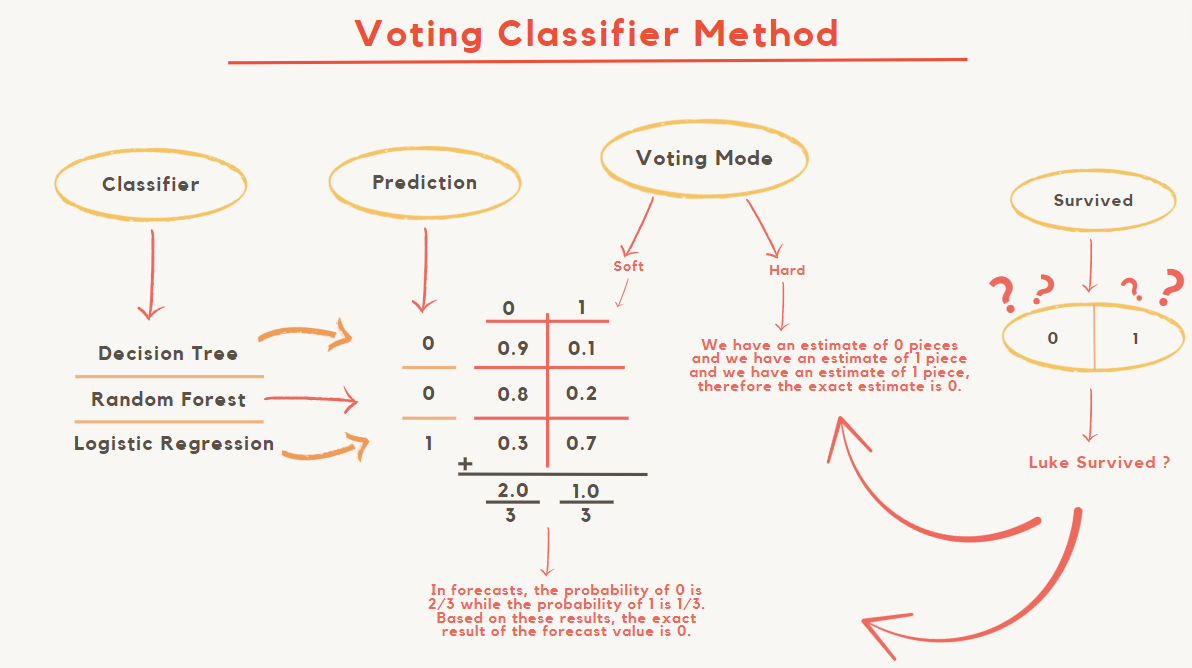

In [ ]:
votingClass = VotingClassifier(estimators=[("dt", best_estimators[0]),  # Decision Tree
                                           ("rfc", best_estimators[2]),  # Random Forest
                                           ("logr", best_estimators[3])],  # Logistic Regression
                                            voting="soft", n_jobs=-1)

votingClass = votingClass.fit(x_train, y_train)
print("Accuracy Score:", accuracy_score(votingClass.predict(x_test),y_test))

<a id=41></a>
## Prediction and Submission


In [ ]:
test_survived = pd.Series(votingClass.predict(test),name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis=1)
results.to_csv("titanic.csv", index = False)